In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy.vector import *
from scipy.integrate import quad, quad_vec

plt.style.use("ggplot")

In [2]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols("x y z u_1 u_2 u_3 v_1 v_2 v_3 t")

# Vectors and Geometry

Numerical or symbolic

In [3]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [4]:
u.subs([(u1, 3)])

Matrix([
[  3],
[u_2],
[u_3]])

## Addition & multiplication

In [5]:
2*(a + b)

array([16, 20, 24])

In [6]:
2 * (u + v)

Matrix([
[2*u_1 + 2*v_1],
[2*u_2 + 2*v_2],
[2*u_3 + 2*v_3]])

## Dot products

In [7]:
np.dot(a, b)

50

In [8]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

## Cross products

In [9]:
np.cross(a, b)

array([-6, 12, -6])

In [10]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

## Length of vector

In [11]:
np.linalg.norm(a)

3.7416573867739413

In [12]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

## Vector projection

$$\text{proj}_v (u) = \frac{u.v}{|v|^2 } u$$

In [13]:
proj_b_a = np.dot(a,b)/np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [14]:
proj_u_v = u.dot(v)/v.norm()**2 *u 
proj_u_v

Matrix([
[u_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[u_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[u_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

## Lines/Planes in space

Lines: $$
\vec{r}(t) = \vec{r}_0 + t\vec{v}
$$

In [15]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes:
$$
\vec{n}.(P_0 - <x, y, z>) = 0
$$

In [16]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0 - r) # = 0

-x - y - z + 16

**Examples**: Find vector parallel to the line of intersection of the two planes $3x - 6y-2z=15$ and $2x +y -2z = 5$ (it's going to be perpendicular to both normal vectors).

In [17]:
n1 = np.array([3, -6, -2])
n2 = np.array([2, 1, -2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

# Vector Calculus

## Vector Derivatives

In [18]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [19]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example** Find the angle between the velocity and acceleration as a function of time $\theta (t)$

In [20]:
v = smp.diff(r, t)
a = smp.diff(v, t)

In [21]:
theta = smp.acos(v.dot(a) / (v.norm() * a.norm())).simplify()

In [22]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [24]:
theta.subs(t, 6).evalf()

0.251108015692338

In [27]:
# smp.lambdify([args], sympy_func)(num_args)

<function _lambdifygenerated(t)>

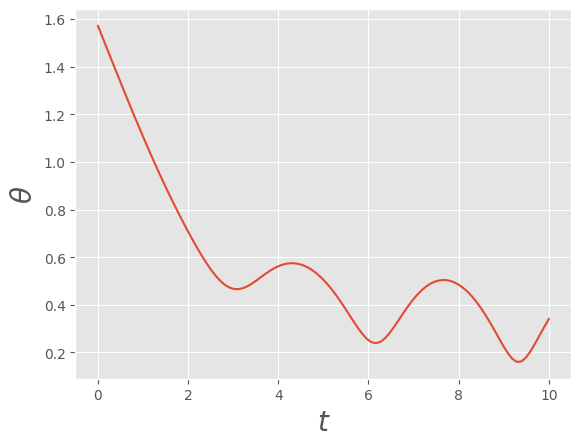

In [33]:
tt = np.linspace(0,10,100)
aa = smp.lambdify([t], theta)(tt)
plt.plot(tt, aa);
plt.xlabel("$t$", fontsize=20);
plt.ylabel(r"$\theta$", fontsize=20);

## Vector Integrals

Note: Exclude + C

In [40]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [41]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In some cases integral can't be evaluated symbolically, must solve definite integral numerically:

In [44]:
r = smp.Matrix([smp.exp(t**2) * smp.cos(t)**2, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**2],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [45]:
smp.integrate(r).doit() # can't doit

Matrix([
[                Integral(exp(t**2)*cos(t)**2, t)],
[gamma(1/4)*lowergamma(1/4, t**4)/(16*gamma(5/4))],
[                     sqrt(3)*atan(sqrt(3)*t/3)/3]])

In [48]:
r_num = smp.lambdify([t], r)
r_num(3) # test case

array([[7.94171217e+03],
       [6.63967720e-36],
       [8.33333333e-02]])

In [49]:
# integrate from 0 to 4, [0]: results, [1]:error
quad_vec(r_num, 0, 4)[0]

array([[6.38216178e+05],
       [9.06402477e-01],
       [6.70972506e-01]])

## Arclength

$$
\int_{a}^{b} \sqrt{dx^2 + dy^2 + dz^2}
$$

Rare case can be done symbolically.

Find arclength of $<0, t, t^2>$ from $t=0$ to $t= 1$

In [50]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])